In [1]:
'''Tools in development'''

'Tools in development'

In [2]:
#packages
from test_teamrise.toolbox import extract, Objective_Tree
from openpyxl import load_workbook

def extract_team_id(user_list):
    out=dict()
    for user in user_list :
        out[user['id']]=user['team_id']
    return out

In [3]:
#loading file
wb = load_workbook('data/Test Dev- Dataset.xlsx')
wb.get_sheet_names()

['users', 'objectives']

In [4]:
#load worksheets
users = wb["users"]
objectives = wb["objectives"]
fv,v=extract(objectives)
fu,u=extract(users)

In [5]:
#create tree
T=Objective_Tree(v)

In [6]:
#fill missing fields
T.compute_children_progress()
T.fill_level_and_team(extract_team_id(u))

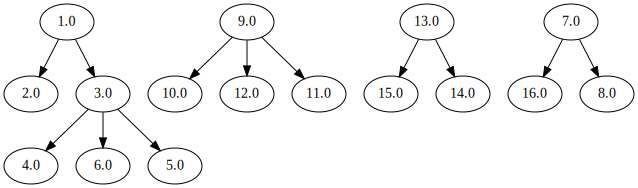

In [7]:
T.to_graph(function=lambda: )

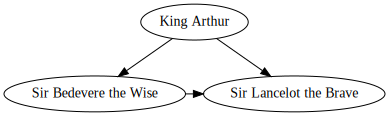

In [8]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

dot